In [1]:
import os
import tensorflow as tf

def predict_logits(model_path, test_dir):
    """
    Takes a model path and test directory, returns dictionary of filename:logit pairs.
    
    Args:
        model_path (str): Path to the .h5 model file
        test_dir (str): Directory containing test images
        
    Returns:
        dict: Dictionary with filenames as keys and logits as values
    """
    # Load model
    model = tf.keras.models.load_model(model_path)
    
    # Get all image files recursively
    image_files = []
    for root, _, files in os.walk(test_dir):
        for file in files:
            if file.lower().endswith('.jpg'):
                image_files.append(os.path.join(root, file))
    
    # Create dataset
    def process_image(path):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (224, 224)) 
        #img = tf.cast(img, tf.float32) / 255.0 # <<<<<<<< test if this is needed!!!!!!!!!
        return img
    
    # Create dataset from image files
    dataset = tf.data.Dataset.from_tensor_slices(image_files)
    dataset = dataset.map(process_image)
    dataset = dataset.batch(32)
    
    # Get predictions
    predictions = model.predict(dataset, verbose=0)
    
    # Create dictionary of filename:logit pairs
    results = {os.path.basename(fname): float(logit) 
              for fname, logit in zip(image_files, predictions.flatten())}
    
    return results

# Example usage:
# model_path = "path/to/your/model.h5"
# test_dir = "path/to/test/data"
# results = predict_logits(model_path, test_dir)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def plot_logit_histogram(logits_dict, save_path=None, bins=50):
    """
    Creates a histogram of logit values.
    
    Args:
        logits_dict (dict): Dictionary with filenames as keys and logits as values
        save_path (str, optional): Path to save the plot. If None, displays the plot
        bins (int, optional): Number of bins for histogram. Default is 50
    """
    # Get all logit values
    logit_values = list(logits_dict.values())
    
    # Create figure with larger size
    plt.figure(figsize=(10, 6))
    
    # Create histogram
    n, bins, patches = plt.hist(logit_values, bins=bins, edgecolor='black')
    
    # Add title and labels
    plt.title('Distribution of Logit Values', fontsize=12)
    plt.xlabel('Logit Value', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Add mean and median lines
    mean_logit = np.mean(logit_values)
    median_logit = np.median(logit_values)
    
    plt.axvline(mean_logit, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_logit:.3f}')
    plt.axvline(median_logit, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_logit:.3f}')
    
    # Add legend
    plt.legend()
    
    # Adjust layout to prevent cutting off labels
    plt.tight_layout()
    
    # Save or show the plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
    else:
        plt.show()
    
    # Print basic statistics
    print(f"\nLogit Statistics:")
    print(f"Mean: {mean_logit:.3f}")
    print(f"Median: {median_logit:.3f}")
    print(f"Min: {min(logit_values):.3f}")
    print(f"Max: {max(logit_values):.3f}")
    print(f"Std Dev: {np.std(logit_values):.3f}")

# Example usage:
"""
# First get the logits using the previous function
logits = predict_logits("path/to/model.h5", "path/to/test/folder")

# Then create the histogram
plot_logit_histogram(logits, save_path="logit_histogram.png")  # Save to file
# or
plot_logit_histogram(logits)  # Display directly
"""

'\n# First get the logits using the previous function\nlogits = predict_logits("path/to/model.h5", "path/to/test/folder")\n\n# Then create the histogram\nplot_logit_histogram(logits, save_path="logit_histogram.png")  # Save to file\n# or\nplot_logit_histogram(logits)  # Display directly\n'

In [3]:
model_path = r"D:\Kananat\_result\result_5px\models\DenseNet201\DenseNet201_bo40_lr0001.h5"
test_dir = r"D:\Kananat\TF_TMJOA_jpg_x_5px_test_total"
results = predict_logits(model_path, test_dir)

print(results)

KeyboardInterrupt: 

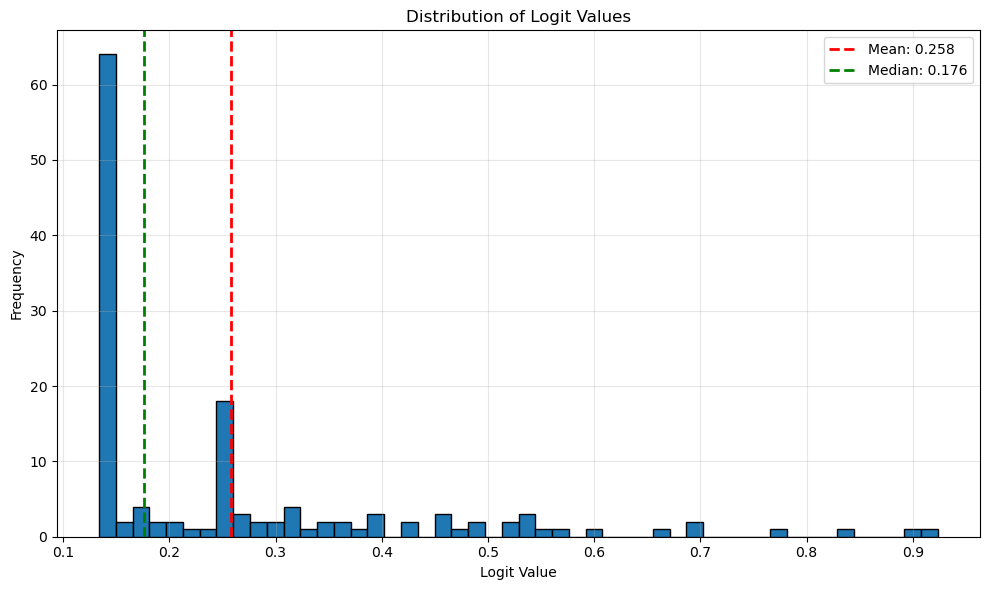


Logit Statistics:
Mean: 0.258
Median: 0.176
Min: 0.134
Max: 0.924
Std Dev: 0.175


In [ ]:
plot_logit_histogram(results)